# Композиции алгоритмов, случайный лес

В прошлый раз вы узнали что такое деревое решений. Оно очень просто, но при этом легко прееобучается. Есть два варианта для ограничения переобучения, это ограничение глубины и стижка дерева. Первый способ легкий но не эфективынй, второй сложный, но спорный.

Ну а что если, собрать все деревья c разынми параметрами и посмотреть, сделают ли они вместе лучший прогноз чем просто одно дерево?

Начнем с простого, с понятий.

**Композиция Алгоритмов**(ансамбль алгоритмов) — это объединение N алгоритмов $b_1(x), ..., b_N (x)$ в один. Идея заключается в том, чтобы обучить алгоритмы $b_1(x), ..., b_N(x)$, а затем усреднить полученные от них ответы:


$$ a(x) = \frac{1}{N} \sum\limits_{n=1}^N b_n(x) $$

Это выражение непосредственно является ответом в задаче регрессии. В задачах классификации нужно будет взять знак от получившегося выражения:

$$ a(x) = sign \frac{1}{N} \sum\limits_{n=1}^N b_n(x) $$

Например, пусть при решении задачи классификации с двумя классами использовались 6 базовых алгоритмов, которые на нектором объекте x выдали следующие ответы:

$$ -1, -1 , 1 , -1 ,1 -1 $$ 

Ответ композиции этих 6 алгоритмов будет:

$$ a(x) = sign (-\frac{2}{6}) = -1 $$

Попросту говоря, объект был отнесен к классу −1, так как за этот вариант «проголосовало» большинство базовых алгоритмов.


###  Генерация случайного подмножества
Другой подход к рандомизации — генерация случайного подмножества обучающей выборки. Размер этого случайного подмножества является гиперпараметром. Например, можно случайно взять половину исходной выборки и обучить на ней базовый алгоритм. Этот подход несколько проигрывает бутстрапу, так как содержит гиперпараметр, в то время как бутстрап без какой-либо настройки выдает подвыборку.

### Решающие деревья (композиции деревьев)

Если с помощью бутстрапа построить 100 базовых решающих деревьев и объединить их в композицию, раз- деляющая поверхность будет все еще сложная, но уже гораздо менее переобученная:
![trees](img/trees.png)
Разделяющая поверхность уже не подгоняется под большую часть попавших в гущу чужого класса объектов и в целом хорошо разделяет два класса. Увеличением количества базовых алгоритмов можно устранить оставшиеся погрешности.

## Разложение ошибки: шум, смещение и разброс

Ошибка алгоритма на новых тестовых данных складывается из трех компонент: шума, смещения и разброса. При этом все они характеризуют разные аспекты данных и модели, с помощью которой решается задача на этих данных:
- Шум — компонента ошибки алгоритма, которая будет проявляться даже на идеальной модели в этой задаче. Другими словами, шум является характеристикой данных и будет проявляться, какая бы модель не использовалась.

Пусть обучающая выборка генерируется из некоторого вероятностного распределения. На каждой конкретной обучающей выборке можно обучить некоторую модель и использовать обученную модель на тестовой выборке.
- Cмещение — отклонение, усредненного по различным обучающим выборкам, прогноза заданной мо- дели от прогноза идеальной модели.
- Разброс — дисперсия ответов моделей, обученных по различным обучающим выборкам. Разброс ха- рактеризует то, насколько сильно прогноз алгоритма зависит от конкретной обучающей выборки.

Линейные модели способны восстанавливать только линейные зависимости, а, следовательно, в случае нелинейных задач, которых подавляющее большинство, смещение при использовании таких алгоритмов бу- дет большим. Разброс, наоборот, будет маленьким из-за малого числа параметров, сравнимого с количеством признаков. Вряд ли параметры линейной модели сильно поменяются при незначительном изменении обучаю- щей выборки. Решающие деревья — полная противоположность. Они характеризуются низким смещением, то есть способны восстанавливать сложные закономерности, и большим разбросом: решающие деревья сильно меняются даже при небольших изменениях обучающей выборки.


### Смещение и разброс композиции алгоритмов

При вычислении композиции базовых алгоритмов (с одинаковым смещением) смещение композиции совпадает со смещением отдельного базового алгоритма. Таким образом, поскольку деревья характеризуются низким смещением, то же самое будет верно и для композиции деревьев. Следовательно, композиции деревьев тоже способны восстанавливать сложные закономерности. 

Разброс композиции уже отличается от разброса одного базового алгоритма:

$$ (\text{разброс композиции})  = \frac{1}{N} \text{(разброс одного базового алгоритма)} + \text{(корелляция между базовыми алгоритмами)} $$


Если базовые алгоритмы независимы, то есть их прогнозы не коррелируют между собой, выражение упрощается:

$$ (\text{разброс композиции})  = \frac{1}{N} \text{(разброс одного базового алгоритма)} $$

Фактически, композиция достаточного количества некоррелированных алгоритмов может дать идеальный алгоритм. Но, к сожалению, базовые алгоритмы всегда получаются в той или иной степени коррелированы, так как обучаются на подвыборках одной выборки. Таким образом, возникает необходимость уменьшения корелляции базовых алгоритмов.

### Уменьшение кореляции 
Существуют следующие два подхода по уменьшению корреляции базовых алгоритмов:
1. **Беггинг**: Обучение базовых алгоритмов происходит на случайных подвыборках обучающей выборки. Причем чем меньше размер случайной подвыборки, тем более независимыми получаются базовые алгоритмы.
2. **Метод случайных подпространств**: выбирается случайное подмножество признаков (столбцов мат- рицы «объекты–признаки») и очередной базовый алгоритм обучается только на этих признаках. Доля выбираемых признаков является гиперпараметром этого метода.

Два данных подхода — бэггинг и метод случайных подпространств — можно объединять и использовать одновременно.


### Bootstrap
Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман Ле́о Бре́йманом в 1994 году. Бэггинг основан на статистическом методе бутстрэппинга, который позволяет оценивать многие статистики сложных моделей.

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $X$ размера $N$. Равномерно возьмем из выборки $N$ объектов с возвращением. Это означает, что мы будем $N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\frac{1}{N}$ ), причем каждый раз мы выбираем из всех исходных $N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $X_1$. Повторяя процедуру $M$ раз, сгенерируем M подвыборок $X_1,…,X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

![bootstrap](img/bootstrap.jpg)

Давайте для примера возьмем вам уже известный датасет telecom_churn из прошлых уроков нашего курса. Напомним, что это задача бинарной классификации оттока клиентов. Одним из самых важных признаков в этом датасете является количество звонков в сервисный центр, которые были сделаны клиентом. Давайте попробуем визулизировать данные и посмотреть на распределение данного признака.

/home/mr9bit/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


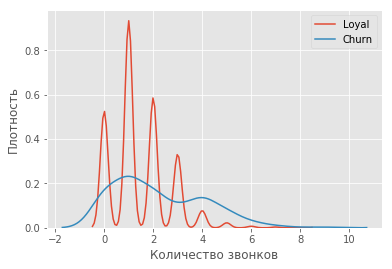

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

telecom_data = pd.read_csv('../4_lecture/data/telecom_churn.csv')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Количество звонков', ylabel='Плотность')    
plt.show()


Как вы уже могли заметить, количество звонков в сервисный центр у лояльных клиентов меньше, чем у наших бывших клиентов. Теперь было бы хорошо оценить сколько в среднем делает звонков каждая из групп. Так как данных в нашем датасете мало, то искать среднее не совсем правильно, лучше применить наши новые знания бутстрэпа. Давайте сгенерируем 1000 новых подвыборок из нашей генеральной совокупности и сделаем интервальную оценку среднего.


In [27]:


import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# сохранение в отдельные numpy массивы данных по лояльным и уже бывшим клиентам
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

#  выводим интервальную оценку среднего
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))



Service calls from loyal:  mean interval [1.4077193  1.49473684]
Service calls from churn:  mean interval [2.0621118  2.39761905]


В итоге мы получили, что с 95% вероятностью среднее число звонков от лояльных клиентов будет лежать в промежутке между 1.40 и 1.50, в то время как наши бывшие клиенты звонили в среднем от 2.06 до 2.40 раз. Также ещё можно обратить внимание, что интервал для лояльных клиентов уже, что довольно логично, так как они звонят редко (в основном 0, 1 или 2 раза), а недовольные клиенты будут звонить намного чаще, но со временем их терпение закончится, и они поменяют оператора.

### Бэггинг

Теперь вы имеете представление о бустрэпе, и мы можем перейти непосредственно к бэггингу. Пусть имеется обучающая выборка $X$. С помощью бутстрэпа сгенерируем из неё выборки $X_1, ..., X_M$. Теперь на каждой выборке обучим свой классификатор a_i(x). Итоговый классификатор будет усреднять ответы всех этих алгоритмов  (в случае классификации это соответствует голосованию):
$$ a(x) = \frac{1}{M} \sum \limits_{i=1}^M a_i(x) $$

![bagging](img/bagging.png)Рассмотрим задачу регрессии с базовыми алгоритмами $\large b_1(x), \dots , b_n(x)$. Предположим, что существует истинная функция ответа для всех объектов $\large y(x)$, а также задано распределение на объектах $\large p(x)$. В этом случае мы можем записать ошибку каждой функции регрессии $$ \large \varepsilon_i(x) = b_i(x) − y(x),  i = 1, \dots, n$$
и записать матожидание среднеквадратичной ошибки $$ \large E_x(b_i(x) − y(x))^{2} = E_x \varepsilon_i (x). $$

Средняя ошибка построенных функций регрессии имеет вид $$ \large E_1 = \frac{1}{n}E_x \sum_{i=1}^n \varepsilon_i^{2}(x) $$

Предположим, что ошибки несмещены и некоррелированы: 

$$ \large \begin{array}{rcl} E_x\varepsilon_i(x) &=& 0, \\
E_x\varepsilon_i(x)\varepsilon_j(x) &=& 0, i \neq j. \end{array}$$

Построим теперь новую функцию регрессии, которая будет усреднять ответы построенных нами функций:
$$ \large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x) $$

Найдем ее среднеквадратичную ошибку:

$$ \large \begin{array}{rcl}E_n &=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\Big)^2 \\
&=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\Big)^2 \\
&=& \frac{1}{n^2}E_x\Big(\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\Big) \\
&=& \frac{1}{n}E_1\end{array}$$

Таким образом, усреднение ответов позволило уменьшить средний квадрат ошибки в n раз!

Бэггинг позволяет **снизить дисперсию** (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. 

**Эффективность** бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

В библиотеке scikit-learn есть реализация BaggingRegressor и BaggingClassifier, которая позволяет использовать большинство других алгоритмов "внутри". Рассмотрим на практике как работает бэггинг и сравним его с деревом решений, воспользуясь примером из документации.

Дерево решений: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Бэггинг(Дерево решений): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


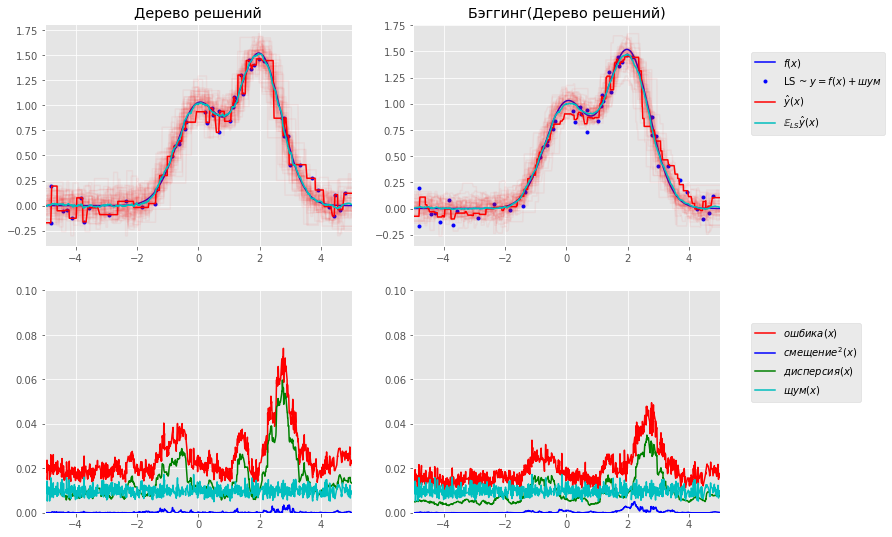

In [32]:

# Author: Gilles Louppe <g.louppe@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['figure.figsize'] = 15, 15
# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Дерево решений", DecisionTreeRegressor()),
              ("Бэггинг(Дерево решений)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(15, 9))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+шум$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$ошбика(x)$")
    plt.plot(X_test, y_bias, "b", label="$смещение^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$дисперсия(x)$"),
    plt.plot(X_test, y_noise, "c", label="$щум(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

По графику и результатам выше видно, что ошибка дисперсии намного меньше при бэггинге, как мы и доказали теоретически выше.

Бэггинг эффективен на малых выборках, когда исключение даже малой части обучающих объектов приводит к построению существенно различных базовых классификаторов. В случае больших выборок обычно генерируют подвыборки существенно меньшей длины.

Следует отметить, что рассмотренный нами пример не очень применим на практике, поскольку мы сделали предположение о некоррелированности ошибок, что редко выполняется. Если это предположение неверно, то уменьшение ошибки оказывается не таким значительным. В следующих лекциях мы рассмотрим более сложные методы объединения алгоритмов в композицию, которые позволяют добиться высокого качества в реальных задачах.

### Случайный лес

Ранее были получены следующие результаты: 
• Ошибка может быть разложена на смещение и разброс. 
• Смещение композиции близко к смещению одного базового алгоритма. 
• Разброс при построении композиции уменьшается, причем тем сильнее, чем менее коррелированы базо- вые алгоритмы. 

Рассмотренных в прошлый раз способов понижения корреляции между базовыми алгоритмами (бэггинг и метод случайных пространств) оказывается недостаточно. Чтобы базовые алгоритмы были еще менее скореллированными, имеет смысл сделать случайным их процесс построения.

### Рандомизация процесса построения решающих деревьев

Процесс построения решающих деревьев представляет собой жадный алгоритм, работающий до выполнения критерия останова. Пусть на некотором шаге алгоритма необходимо разбить вершину $m$, в которой оказалась выборка $X_m$ , на две. В качестве условия разбиения используется сравнение $j$-го признака с порогом $t$:

$$ [x^j \leq t] $$

Параметры $j$ и $t$ выбираются исходя из условия минификации функции ошибки $Q(X_m, j,t)$

$$ Q(X_m, j,t) \rightarrow \min_{j,t} $$


Рандомизировать процесс построения можно, если в задаче поиска оптимальных параметров выбирать $j$ из случайного подмножества признаков размера $q$. Оказывается, что этот подход действительно позволяет сделать деревья менее коррелированными.



Рандомизировать процесс построения можно, если в задаче поиска оптимальных параметров выбирать j из случайного подмножества признаков размера q. Оказывается, что этот подход действительно позволяет сделать деревья менее коррелированными.

![qq](img/qq.png)

По графику видно, что чем меньше «простор для выбора лучшего разбиения», то есть чем меньше q, тем меньше корреляции между получающимися решающими деревьями. Случай q = 1 соответствует абсолютно случайному выбору признака.

#### Алгоритм построения случайного леса

Чтобы построить случайный лес из N решающих деревьев, необходимо:

1. Построить с помощью бутстрапа $N$ случайных подвыборок $\tilde{X_n} , n = 1, ..., N $.
2. Каждая получившаяся подвыборка $\tilde{X_n}$ используется как обучающая выборка для построения соответ- ствующего решающего дерева b_n (x). Причем:
    1. Дерево строится, пока в каждом листе окажется не более $n_{min}$ объектов. Очень часто деревья строят до конца $(n_{min} = 1)$, чтобы получить сложные и переобученные решающие деревья с низким смещением.
    2. Процесс построения дерева рандомизирован: на этапе выбора оптимального признака, по которому будет происходить разбиение, он ищется не среди всего множества признаков, а среди случайного подмножества размера $q$.
    3. Следует обратить особое внимание, что случайное подмножество размера $q$ выбирается заново каждый раз, когда необходимо разбить очередную вершину. В этом состоит основное отличие такого подхода от метода случайных подпространств, где случайное подмножество признаков выбиралось один раз перед построением базового алгоритма.
3. Построенные деревья объединяются в композицию


Одна из особенностей случайных лесов: они не переобучаются при росте числа базовых алгоритмов.

![](img/random_trees.png)


По графику видно, что ошибка на тесте сначала уменьшается с ростом числа базовых алгоритмов, а затем выходит на асимптоту. Не происходит роста ошибки при росте числа базовых алгоритмов.

## Сравнение с деревом решений и бэггингом

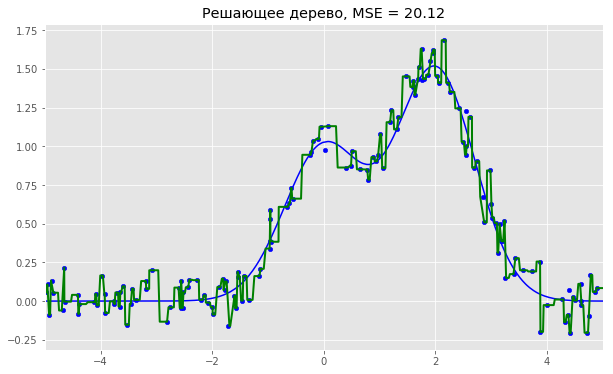

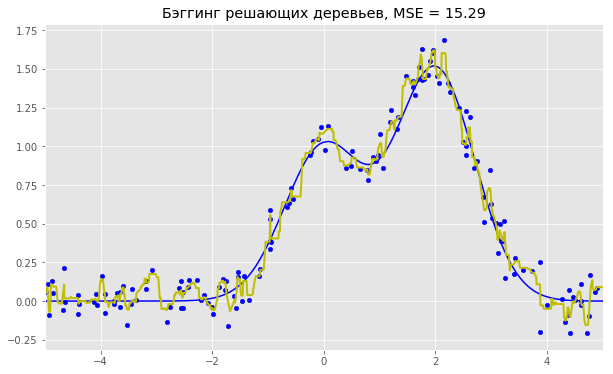

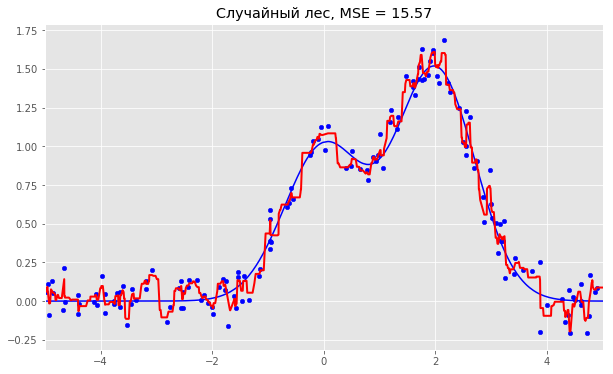

In [37]:


from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

     
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Бэггинг решающих деревьев, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));



Как мы видим из графиков и значений ошибки MSE, случайный лес из 10 деревьев дает лучший результат, чем одно дерево или бэггинг из 10 деревьев решений. Основное различие случайного леса и бэггинга на деревьях решений заключается в том, что в случайном лесе из случайного числа выбирается случайное подмножество признаков, и лучший признак для разделения узла определяется из подвыборки признаков, в отличие от бэггинга, где все функции рассматриваются для разделения в узле.

Также можно увидеть преимущество случайного леса и бэггинга в задачах классификации.


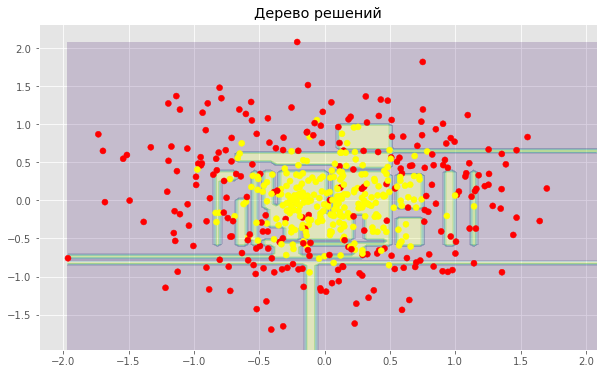

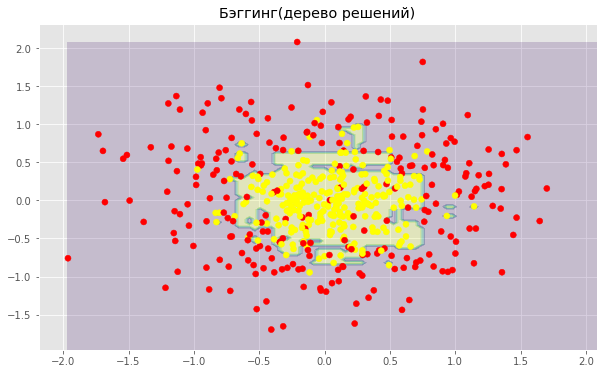

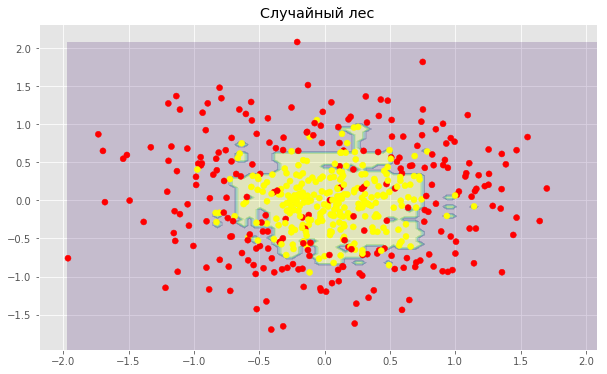

In [38]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Бэггинг(дерево решений)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()



На рисунках выше видно, что разделяющая граница дерева решений очень «рваная» и на ней много острых углов, что говорит о переобучении и слабой обобщающей способности. В то время как у бэггинга и случайного леса граница достаточно сглаженная и практически нет признаков переобучения.

### Параметры

Метод случайного леса реализован в библиотеке машинного обучения scikit-learn двумя классами RandomForestClassifier и RandomForestRegressor.

Полный список параметров случайного леса для задачи регрессии:

**class sklearn.ensemble.RandomForestRegressor()**

**n_estimators** — число деревьев в "лесу" (по дефолту – 10) 

**criterion** — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae") 

**max_features** — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto". max_depth — максимальная глубина дерева (по дефолту глубина не ограничена) 

**min_samples_split** — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2) 

**min_samples_leaf** — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1) 

**min_weight_fraction_leaf** — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес) 

**max_leaf_nodes** — максимальное количество листьев (по дефолту нет ограничения) 

**min_impurity_spli**t — порог для остановки наращивания дерева (по дефолту 1е-7) 

**bootstrap** — применять ли бустрэп для построения дерева (по дефолту True) 

**oob_score** — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False) 

**n_jobs** — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра) 

**random_state** — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int 

**verbose** — вывод логов по построению деревьев (по дефолту 0) 

**warm_start** — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)

Для задачи классификации все почти то же самое, мы приведем только те параметры, которыми RandomForestClassifier отличается от **RandomForestRegressor** 



class sklearn.ensemble.RandomForestClassifier()

**criterion** — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy") 

**class_weight** — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.